In [1]:
import pandas as pd
import numpy as np
import datetime
from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as py
from plotly.offline import iplot
import plotly.express as px 
import cufflinks as cf

py.offline.init_notebook_mode(connected=True)
cf.go_offline()


C:\Users\JESAL\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [2]:
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [3]:
## Model

In [4]:
df=pd.read_csv('FinalDF.csv')
df.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt
0,60,3,9.041922,1,0,3,3,0,4,0,...,2,0,2,2008,8,4,208500,4.174387,196.0,2003.0
1,20,3,9.169518,1,0,3,3,0,2,0,...,2,0,5,2007,8,4,181500,4.382027,0.0,1976.0
2,60,3,9.328123,1,0,0,3,0,4,0,...,2,0,9,2008,8,4,223500,4.219508,162.0,2001.0
3,60,3,9.565214,1,0,0,3,0,2,0,...,2,0,12,2008,8,4,250000,4.430817,350.0,2000.0
4,50,3,9.554993,1,0,0,3,0,4,0,...,2,700,10,2009,8,4,143000,4.442651,0.0,1993.0


In [5]:
X=df.drop('SalePrice',axis=1)
y=df[['SalePrice']]

In [6]:
X.shape

(1177, 79)

In [7]:
y

,SalePrice
0,208500
1,181500
2,223500
3,250000
4,143000
...,...
1172,84500
1173,185000
1174,175000
1175,210000


## Feature Importence

In [8]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

C:\Users\JESAL\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [9]:
model.feature_importances_

array([2.51436092e-03, 3.79046575e-03, 6.10986542e-03, 1.49979788e-05,
       4.58431601e-04, 3.53369444e-03, 3.05262904e-03, 0.00000000e+00,
       1.93367910e-03, 2.46391881e-03, 3.79874900e-03, 1.16358484e-03,
       7.41422642e-05, 2.28049806e-03, 2.97892774e-03, 2.46974319e-01,
       5.45569319e-03, 3.54492834e-02, 8.56801691e-03, 1.91771738e-03,
       8.97062652e-05, 2.64936021e-03, 1.95180487e-03, 2.14587911e-03,
       1.06276848e-01, 1.71346236e-03, 1.89133733e-03, 5.21647629e-02,
       1.09484870e-03, 3.67586889e-03, 4.87720848e-03, 2.22546707e-02,
       4.99100651e-04, 3.35126635e-04, 3.47129611e-03, 1.71969760e-02,
       1.47478014e-04, 2.52050550e-03, 9.11734545e-03, 5.61901209e-04,
       1.59377294e-02, 1.10498293e-02, 3.64138154e-04, 8.49285938e-02,
       1.47398547e-02, 1.23055588e-03, 7.61322906e-02, 6.92776845e-03,
       5.95993326e-03, 1.13003972e-03, 2.03891671e-02, 7.64802232e-03,
       1.16259314e-03, 1.59943710e-02, 1.59615264e-03, 5.11233624e-03,
      

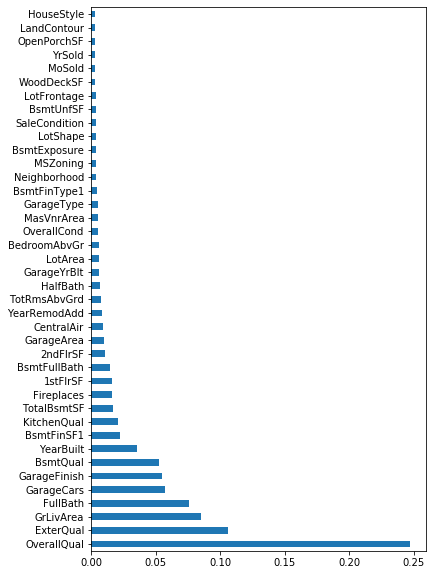

In [10]:
plt.figure(figsize=(6,10))
feature_importance=pd.Series(data=model.feature_importances_,index=X.columns)
feature_importance.nlargest(40).plot(kind='barh')

In [11]:
feature_Sel_model=SelectFromModel(Lasso(alpha=0.05,random_state=20))
feature_Sel_model.fit(X,y)


SelectFromModel(estimator=Lasso(alpha=0.05, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=20,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [12]:
feature_Sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [13]:
selected_feature=X.columns[(feature_Sel_model.get_support())]
print('total features:{}'.format((X.shape[1])))
print('selected feature:{} '.format(len(selected_feature)))
print('feature with coeeficient sharnk to zero:{}'.format(np.sum(feature_Sel_model.estimator_.coef_==0))) #skipped features

total features:79
selected feature:78 
feature with coeeficient sharnk to zero:1


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [15]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [16]:
y_pred

array([[108713.83797321],
       [107277.22535924],
       [213705.5705571 ],
       [228100.00635193],
       [270731.64998778],
       [135771.43572819],
       [163973.06347411],
       [110648.69950405],
       [224167.50251169],
       [141612.77902481],
       [242874.04314821],
       [165481.02531453],
       [104801.17524361],
       [111985.33387673],
       [147994.87985941],
       [330882.75131351],
       [190631.21439536],
       [222463.32521807],
       [130915.63256219],
       [200897.47787238],
       [136088.22101287],
       [109201.21859778],
       [178867.10029906],
       [291425.35311927],
       [226239.39400086],
       [181072.07861482],
       [199283.42522389],
       [223714.1469479 ],
       [141198.93262109],
       [190566.23925169],
       [200369.41883983],
       [ 80819.56122859],
       [127885.37060713],
       [ 84158.32598063],
       [131047.41328427],
       [142224.22373949],
       [ 87437.57413774],
       [ 84186.67511982],
       [ 763

In [17]:
y_test

,SalePrice
334,115000
131,109500
203,241500
707,187500
479,319000
...,...
539,140000
1134,112000
984,147000
53,317000


In [27]:
model.score(X_train,y_train)

0.9054573195706251

In [28]:
model.score(X_test,y_test)

0.8852466327608095

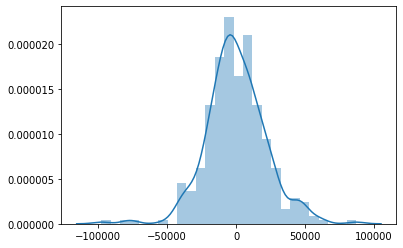

In [29]:
sb.distplot(y_test-y_pred)

In [30]:
from sklearn import metrics

In [31]:
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('MBE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE: 469857766.4273046
MBE: 16185.617872182207
RMSE: 21676.202767719824


In [32]:
metrics.r2_score(y_test,y_pred)

0.8852466327608095